## Prepare dataset

In [2]:
DATASET_NAME = "OASIS"
DATA_PATH = "/data/galati/brain_data/OASIS"

#these functions are to define for each new dataset, unless fixing a rule
#they allow to define a clear association between the data path of a brain image and the corresponding brain/vessel mask
#the brain mask is not mandatory, if not present just return None
import utils
def img_path_to_brain_path(img_path):
    rel_path = os.path.relpath(img_path, start="/data/galati/brain_data/OASIS/")
    rel_path = os.path.dirname(rel_path)
    rel_path = os.path.normpath(rel_path)
    rel_path = rel_path.split(os.sep)
    return os.path.join("/data/galati/brain_data/OASIS_GT", *rel_path[1:-1], "mask.nii.gz")
def img_path_to_vessel_path(img_path):
    rel_path = os.path.relpath(img_path, start="/data/galati/brain_data/OASIS/")
    rel_path = os.path.dirname(rel_path)
    rel_path = os.path.normpath(rel_path)
    rel_path = rel_path.split(os.sep)
    out_path = os.path.join("/data/galati/brain_data/OASIS_GT", *rel_path[1:-1], "vessel_mask_2.nii.gz")
    if not os.path.isfile(out_path):
        out_path = os.path.join("/data/galati/brain_data/OASIS_GT", *rel_path[1:-1], "vessel_mask.nii.gz")
    return out_path
def img_path_to_weight_path(img_path):
    return None

utils.img_path_to_brain_path = img_path_to_brain_path
utils.img_path_to_vessel_path = img_path_to_vessel_path
utils.img_path_to_weight_path = img_path_to_weight_path

#this regex works as a filter in case you have unnecessary .nii files in your dataset folder
PATH_RULE = ".*\_angio.nii.gz$"

#if you have some outliers you want to discard, you can specify it in the list below
OUTLIERs = [
    "sub-OAS30003_ses-d3320_acq-TOF_angio.nii.gz",
    "sub-OAS30007_ses-d1981_acq-TOF_angio.nii.gz",
    "sub-OAS30013_ses-d0102_acq-TOF_angio.nii.gz",
    "sub-OAS30046_ses-d0848_acq-TOF_run-01_angio.nii.gz",
    "sub-OAS30046_ses-d1968_acq-TOF_angio.nii.gz",
    "sub-OAS30061_ses-d0035_acq-TOF_angio.nii.gz",
    "sub-OAS30062_ses-d3469_acq-TOF_angio.nii.gz",
    "sub-OAS30083_ses-d3827_acq-TOF_angio.nii.gz"
]

#if you need to preprocess also images with no vessel masks set the following flag to False
VESSELs_REQUIRED = True

#this parameter is to unify the orientation of our images
#set it True if you notice in the examples shown below that the nose is oriented downward and not upward
utils.do_flip = False

#this parameter is to specify whether to discard slices which do not contain any portion of the brain or keep them
DISCARD_EXTRA_SLICES = False

### Extract paths

In [2]:
import os

from utils import search_nii, extract_paths, load_info_from_checkpoint

In [3]:
if not os.path.isfile(f"info_{DATASET_NAME}.pkl"):
    info = {
        "train": extract_paths(path_rule=PATH_RULE),
        "val": None,
        "test": None,
    }
    search_nii(DATA_PATH, info["train"])
else:
    info = load_info_from_checkpoint(f"info_{DATASET_NAME}.pkl")

### Display examples

In [4]:
import random

from utils import print_bold, load_and_display_middle_slice

[Example 01]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 576 768 232   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.29947916 0.29947916 0.59999084 0.025      0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'removed'
aux_file        : b'OAS30071_MR_d0055'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 1.7433789e-25
quatern_c       : 1.7e-15
quatern_d       : -1.02551696e-10


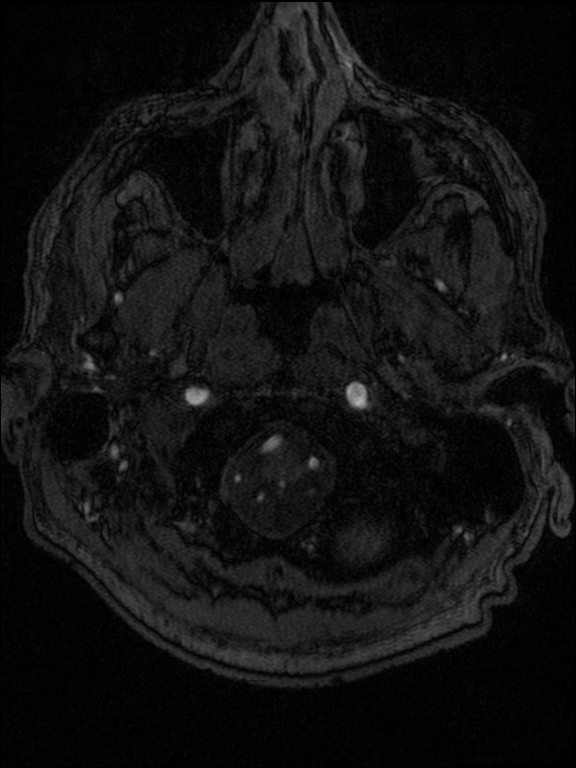

[Example 02]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 576 768 232   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.29947916 0.29947916 0.5999985  0.023      0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'removed'
aux_file        : b'OAS30009_MR_d2457'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 1.7433788e-25
quatern_c       : 1.7e-15
quatern_d       : -1.02551696e-10


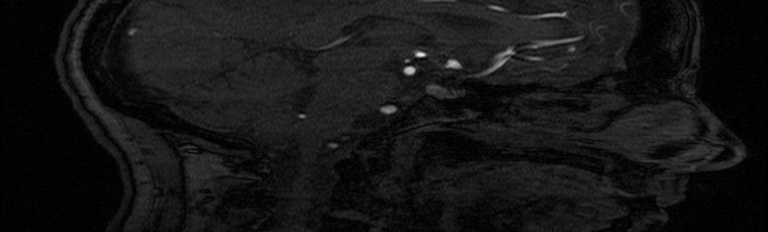

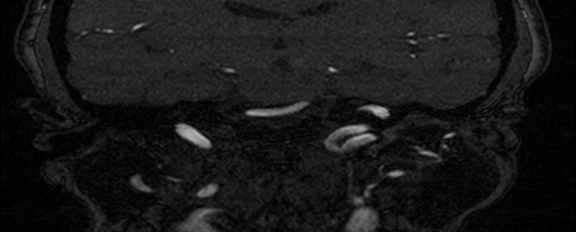

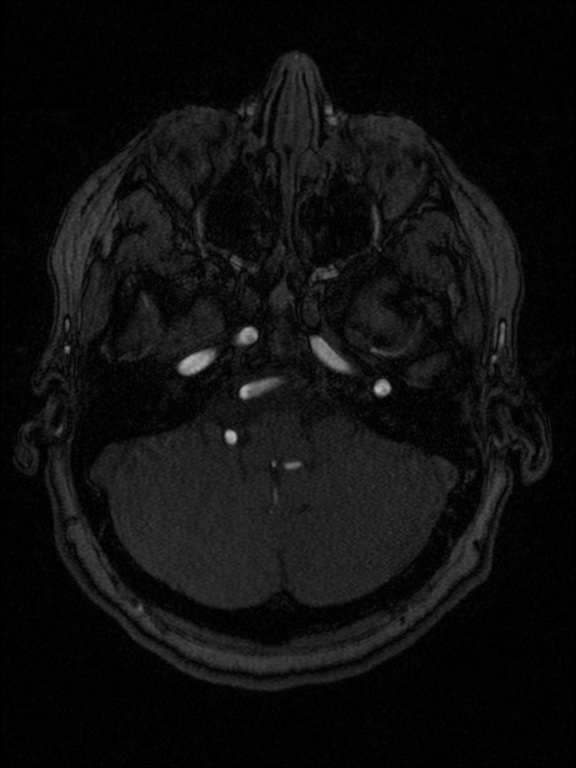

In [6]:
print_bold("[Example 01]")
random.seed(0)
load_and_display_middle_slice(random.choice(info["train"].paths), display_header=True)

print_bold("[Example 02]")
random.seed(1)
load_and_display_middle_slice(random.choice(info["train"].paths), axis=[0,1,2], display_header=True)

### Split train/val/test

In [6]:
from utils import is_medical_volume

In total, there are

In [7]:
IMGs = sum([
    info["train"].paths,
    info["val"].paths if info["val"] is not None else [],
    info["test"].paths if info["test"] is not None else []
], [])

len(IMGs)

674

volumes. First, we discard the outliers:

In [8]:
IMGs = [img_path for img_path in IMGs if os.path.basename(img_path) not in OUTLIERs]

len(IMGs)

666

We have vessel annotations for

In [9]:
HAVE_VESSELs = [
    img_path for img_path in IMGs if is_medical_volume(img_path_to_vessel_path(img_path))
]

len(HAVE_VESSELs)

49

of them. With a chosen ratio of 70-15-15, we select

In [10]:
COUNT_TEST = len(HAVE_VESSELs if VESSELs_REQUIRED else IMGs) * 15 // 100
COUNT_TEST

7

images to be part of the validation/testing set.

In case brain masks are available, we collect them too.

In [11]:
HAVE_BRAINs = [
    img_path for img_path in IMGs if is_medical_volume(img_path_to_brain_path(img_path))
]

len(HAVE_BRAINs)

49

Finally, we randomly split our dataset. 

In [12]:
random.seed(0)

VAL_IMGs = random.sample(sorted(HAVE_VESSELs), COUNT_TEST)

print("val: ", [os.path.basename(img) for img in VAL_IMGs])

random.seed(1)

TEST_IMGs = random.sample(sorted([img for img in HAVE_VESSELs if img not in VAL_IMGs]), COUNT_TEST)

print("test: ", [os.path.basename(img) for img in TEST_IMGs])

TRAIN_IMGs = [img for img in (HAVE_VESSELs if VESSELs_REQUIRED else IMGs) if img not in VAL_IMGs and img not in TEST_IMGs]

val:  ['sub-OAS30043_ses-d0145_acq-TOF_run-01_angio.nii.gz', 'sub-OAS30044_ses-d1319_acq-TOF_angio.nii.gz', 'sub-OAS30003_ses-d2682_acq-TOF_run-01_angio.nii.gz', 'sub-OAS30026_ses-d0696_acq-TOF_angio.nii.gz', 'sub-OAS30057_ses-d0075_acq-TOF_angio.nii.gz', 'sub-OAS30052_ses-d2737_acq-TOF_angio.nii.gz', 'sub-OAS30044_ses-d0061_acq-TOF_angio.nii.gz']
test:  ['sub-OAS30007_ses-d2722_acq-TOF_angio.nii.gz', 'sub-OAS30080_ses-d1318_acq-TOF_angio.nii.gz', 'sub-OAS30005_ses-d2384_acq-TOF_angio.nii.gz', 'sub-OAS30028_ses-d1847_acq-TOF_angio.nii.gz', 'sub-OAS30007_ses-d1636_acq-TOF_angio.nii.gz', 'sub-OAS30074_ses-d2812_acq-TOF_angio.nii.gz', 'sub-OAS30071_ses-d0018_acq-TOF_angio.nii.gz']


In [13]:
import pickle

with open(f"info_{DATASET_NAME}.pkl", "wb") as file:
    pickle.dump({
        k: info[k].__dict__ if info[k] is not None else None for k in info
    }, file)

### Extract spacings and shapes

In [14]:
from utils import load_info_from_checkpoint

info = load_info_from_checkpoint(f"info_{DATASET_NAME}.pkl")

In [15]:
from utils import extract_info_and_masks, loop_nii, display_info, get_target_spacing

In [16]:
info = {
    "train": extract_info_and_masks(path_rule=PATH_RULE),
    "val": extract_info_and_masks(path_rule=PATH_RULE),
    "test": extract_info_and_masks(path_rule=PATH_RULE),
}

loop_nii(TRAIN_IMGs, info["train"])
loop_nii(VAL_IMGs, info["val"])
loop_nii(TEST_IMGs, info["test"])

In [17]:
display_info(info["train"], info["val"])

#volumes  #slices          spacing median  \
TRAIN        35     8056  [000.30 000.30 000.60]   
VAL           7     1646  [000.30 000.30 000.60]   

                                         spacing range  \
TRAIN  [000.30 000.30 000.60] - [000.30 000.30 000.60]   
VAL    [000.30 000.30 000.60] - [000.30 000.30 000.60]   

                 shape median                                      shape range  
TRAIN  [576.00 736.00 232.00]  [502.00 686.00 168.00] - [576.00 768.00 232.00]  
VAL    [576.00 706.00 232.00]  [557.00 680.00 232.00] - [576.00 768.00 254.00]

In [18]:
SPACING = get_target_spacing(
    info["train"].spacings + info["val"].spacings,
    info["train"].shapesAfterCropping() + info["val"].shapesAfterCropping()
)

SPACING

array([0.33691405, 0.44921874, 0.59999847])

In [19]:
import pickle

with open(f"info_{DATASET_NAME}.pkl", "wb") as file:
    pickle.dump({
        k: info[k].__dict__ if info[k] is not None else None for k in info
    }, file)

### Crop, Metadata, Resize, Empty Slices Removal, Standardization

In [20]:
from utils import load_info_from_checkpoint

info = load_info_from_checkpoint(f"info_{DATASET_NAME}.pkl")

In [21]:
import os

from utils import print_bold, preprocessing_loop

In [22]:
print_bold("Training")
preprocessing_loop(
    info["train"],
    os.path.join("numpy", "train"),
    target_spacing=SPACING
)

print_bold("Validation")
preprocessing_loop(
    info["val"],
    os.path.join("numpy", "val"),
    target_spacing=SPACING
)

print_bold("Testing")
preprocessing_loop(
    info["test"],
    os.path.join("numpy", "test"),
    target_spacing=SPACING
)

Training
Slices processed: 158
Slices processed: 338
Slices processed: 494
Slices processed: 650
Slices processed: 803
Slices processed: 970
Slices processed: 1449
Slices processed: 1600
Slices processed: 1752
Slices processed: 1945
Slices processed: 2103
Slices processed: 2248
Slices processed: 2426
Slices processed: 2583
Slices processed: 2733
Slices processed: 2889
Slices processed: 3028
Slices processed: 3172
Slices processed: 3330
Slices processed: 3475
Slices processed: 3634
Slices processed: 3797
Slices processed: 3922
Slices processed: 4104
Slices processed: 4257
Slices processed: 4439
Slices processed: 4602
Slices processed: 4761
Slices processed: 4916
Slices processed: 5033
Slices processed: 5207
Slices processed: 5346
Slices processed: 5492
Validation
Slices processed: 154
Slices processed: 345
Slices processed: 497
Slices processed: 664
Slices processed: 845
Slices processed: 979
Slices processed: 1127
Testing
Slices processed: 168
Slices processed: 320
Slices processed: 48

In [23]:
import pickle

with open(f"info_{DATASET_NAME}.pkl", "wb") as file:
    pickle.dump({
        k: info[k].__dict__ if info[k] is not None else None for k in info
    }, file)

### Outliers removal and slices extraction

In [24]:
from utils import load_info_from_checkpoint

info = load_info_from_checkpoint(f"info_{DATASET_NAME}.pkl")

In [25]:
import os

from utils import print_bold, extraction_loop, display_slice

In [26]:
print_bold("Training")
extraction_loop(
    info["train"],
    os.path.join("slices", "train")
)

print_bold("Validation")
extraction_loop(
    info["val"],
    os.path.join("slices", "val")
)

print_bold("Testing")
extraction_loop(
    info["test"],
    os.path.join("slices", "test")
)

Training


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:07<00:00,  4.73it/s]


Validation


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.63it/s]


In [27]:
import pickle

with open(f"info_{DATASET_NAME}.pkl", "wb") as file:
    pickle.dump({
        k: info[k].__dict__ if info[k] is not None else None for k in info
    }, file)

### Intensity values analysis

In [28]:
from utils import load_info_from_checkpoint

info = load_info_from_checkpoint(f"info_{DATASET_NAME}.pkl")

In [29]:
import numpy as np

from utils import intensity_loop, display_intensity
from utils import get_percentile, display_clipped_slice

Training


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [01:03<00:00,  1.81s/it]


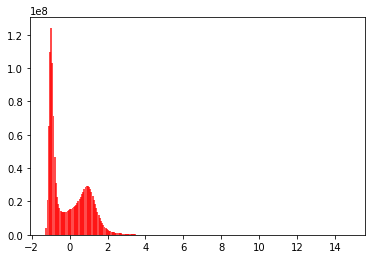

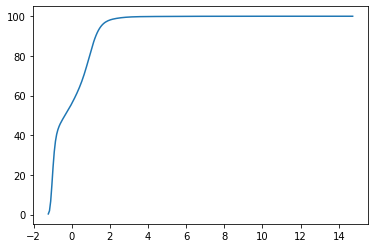

Validation


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:12<00:00,  1.81s/it]


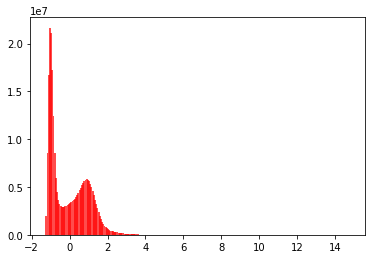

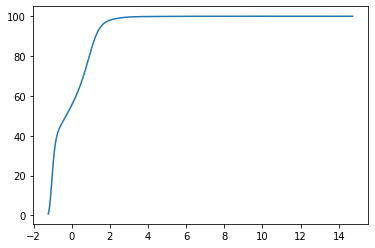

In [30]:
print_bold("Training")
intensity_loop(
    info["train"],
    min_value=min(info["train"].min_values + info["val"].min_values),
    max_value=max(info["train"].max_values + info["val"].max_values)
)
display_intensity(info["train"])

print_bold("Validation")
intensity_loop(
    info["val"],
    min_value=min(info["train"].min_values + info["val"].min_values),
    max_value=max(info["train"].max_values + info["val"].max_values)
)
display_intensity(info["val"])

In [31]:
MIN_VALUE = get_percentile(
    info["train"].bins,
    info["train"].intensity_count + info["val"].intensity_count,
    0.1
)
MAX_VALUE = get_percentile(
    info["train"].bins,
    info["train"].intensity_count + info["val"].intensity_count,
    99.9
)

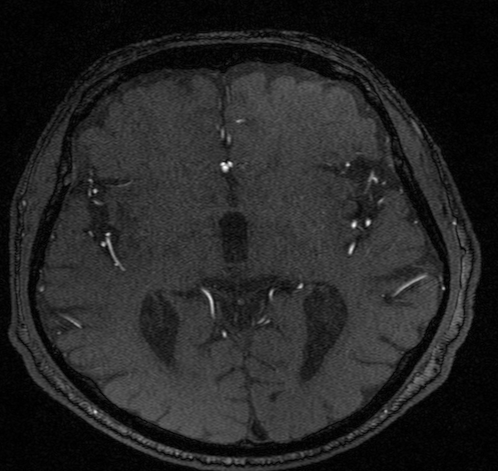

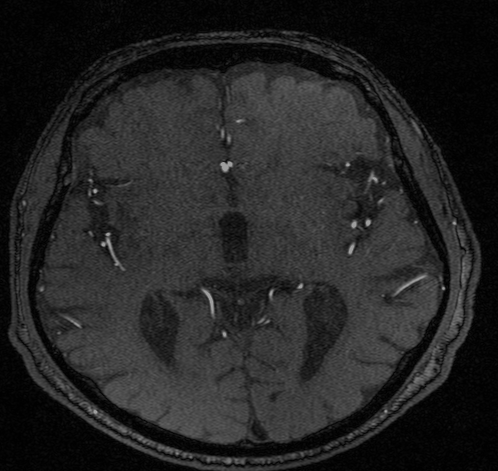

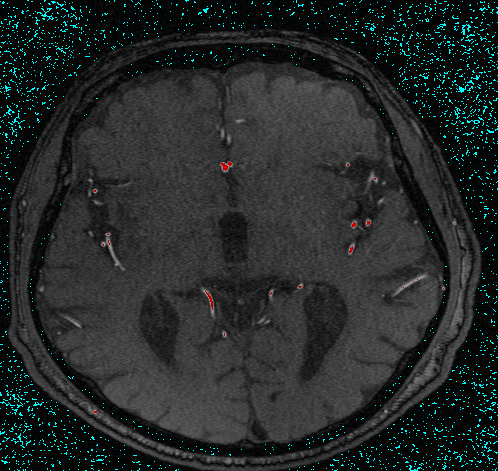

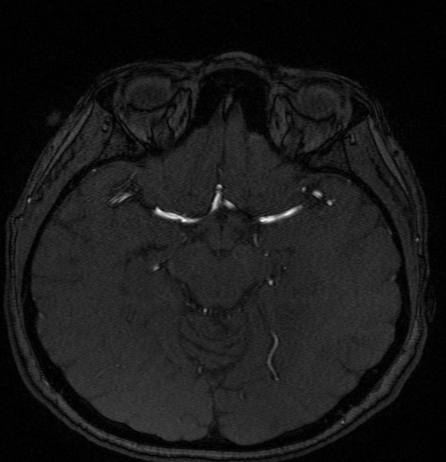

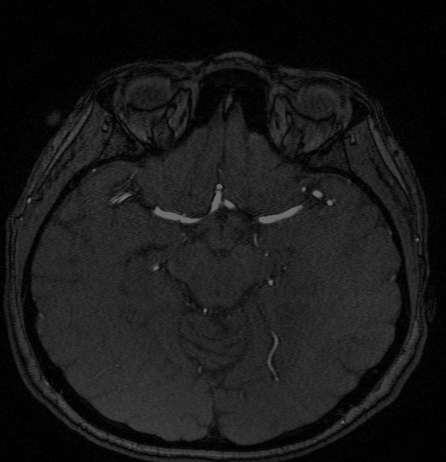

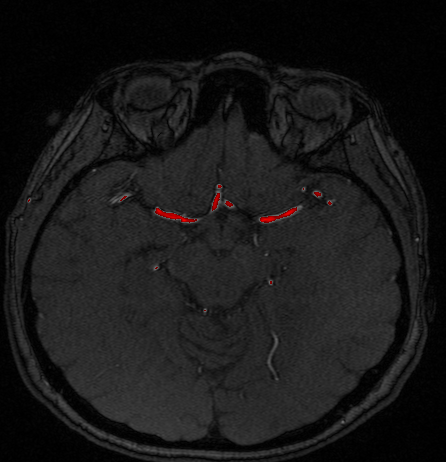

In [32]:
min_values_idx = np.argmin(
    info["train"].min_values + info["val"].min_values
)
DARK = (info["train"].preprocessed_paths + info["val"].preprocessed_paths)[min_values_idx]
DARK = DARK.replace("numpy/", "slices/").replace(".npy", "_slice{:03d}.npy").format(100)
display_clipped_slice(DARK, MIN_VALUE, MAX_VALUE)

max_values_idx = np.argmax(
    info["train"].max_values + info["val"].max_values
)
BRIGHT = (info["train"].preprocessed_paths + info["val"].preprocessed_paths)[max_values_idx]
BRIGHT = BRIGHT.replace("numpy/", "slices/").replace(".npy", "_slice{:03d}.npy").format(100)
display_clipped_slice(BRIGHT, MIN_VALUE, MAX_VALUE)

In [33]:
import pickle

with open(f"info_{DATASET_NAME}.pkl", "wb") as file:
    pickle.dump({
        k: info[k].__dict__ if info[k] is not None else None for k in info
    }, file)

### Normalization, Padding & Cropping, One-Hot Encoding

In [4]:
from utils import load_info_from_checkpoint

info = load_info_from_checkpoint(f"info_{DATASET_NAME}.pkl")

In [5]:
import numpy as np

from utils import display_slice, normalization_loop

In [36]:
print_bold("Training")
normalization_loop(info["train"], f"preprocess_{DATASET_NAME}/train", MIN_VALUE, MAX_VALUE)#, delete_old=False)#TO DELETE

print_bold("Validation")
normalization_loop(info["val"], f"preprocess_{DATASET_NAME}/val", MIN_VALUE, MAX_VALUE)#, delete_old=False)#TO DELETE

print_bold("Testing")
normalization_loop(info["test"], f"preprocess_{DATASET_NAME}/test", MIN_VALUE, MAX_VALUE)#, delete_old=False)#TO DELETE

Training


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [01:01<00:00,  1.75s/it]


Validation


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:12<00:00,  1.79s/it]


Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:12<00:00,  1.81s/it]


In [37]:
np.save(f"preprocess_map_{DATASET_NAME}.npy", {
    "train": sorted(os.listdir(f"preprocess_{DATASET_NAME}/train")),
    "val": sorted(os.listdir(f"preprocess_{DATASET_NAME}/val")),
    "test": sorted(os.listdir(f"preprocess_{DATASET_NAME}/test")),
})

In [14]:
import os
os.listdir(f"preprocess_{DATASET_NAME}/train")

['sub-OAS30002_ses-d2340_acq-TOF_angio_slice001.npy',
 'sub-OAS30003_ses-d3731_acq-TOF_angio_slice001.npy',
 'sub-OAS30004_ses-d3457_acq-TOF_angio_slice001.npy',
 'sub-OAS30005_ses-d3453_acq-TOF_angio_slice001.npy',
 'sub-OAS30006_ses-d2342_acq-TOF_angio_slice001.npy',
 'sub-OAS30008_ses-d1313_acq-TOF_angio_slice001.npy',
 'sub-OAS30008_ses-d1327_acq-TOF_angio_slice001.npy',
 'sub-OAS30009_ses-d2457_acq-TOF_angio_slice001.npy',
 'sub-OAS30010_ses-d0068_acq-TOF_angio_slice001.npy',
 'sub-OAS30025_ses-d2298_acq-TOF_angio_slice001.npy',
 'sub-OAS30026_ses-d0129_acq-TOF_angio_slice001.npy',
 'sub-OAS30028_ses-d1260_acq-TOF_angio_slice001.npy',
 'sub-OAS30032_ses-d3499_acq-TOF_run-01_angio_slice001.npy',
 'sub-OAS30037_ses-d0154_acq-TOF_angio_slice001.npy',
 'sub-OAS30038_ses-d4495_acq-TOF_angio_slice001.npy',
 'sub-OAS30039_ses-d0103_acq-TOF_angio_slice001.npy',
 'sub-OAS30042_ses-d0067_acq-TOF_angio_slice001.npy',
 'sub-OAS30048_ses-d3375_acq-TOF_angio_slice001.npy',
 'sub-OAS30048_ses-d3

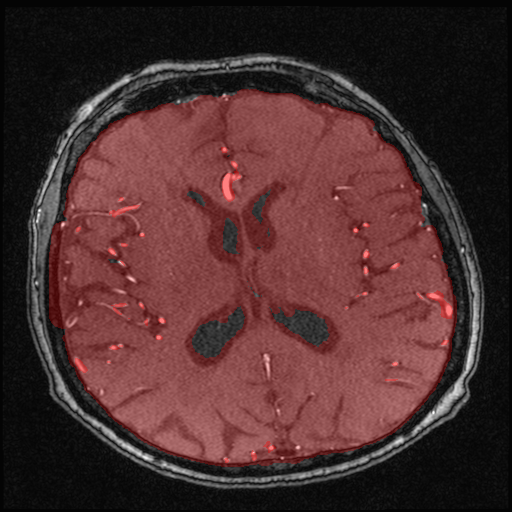

In [42]:
import numpy as np

img_example = np.load(
    f"preprocess_{DATASET_NAME}/train/sub-OAS30066_ses-d2006_acq-TOF_angio_slice130.npy", allow_pickle=True
).item()

img_example, msk_example = img_example["data"][:,:,0], img_example["mask"]

msk_example = np.argmax(msk_example, axis=-1)

display_slice(img_example, min_val=-1, max_val=1, mask=msk_example/2)

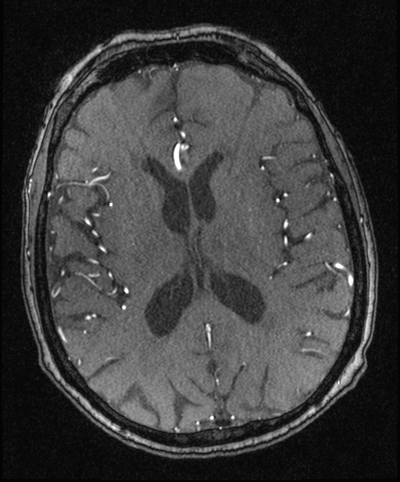

In [44]:
from PIL import Image

Image.fromarray(((img_example+1)*127.5).astype(np.uint8)).rotate(90).resize((400,512)).crop((0,30,400,512))

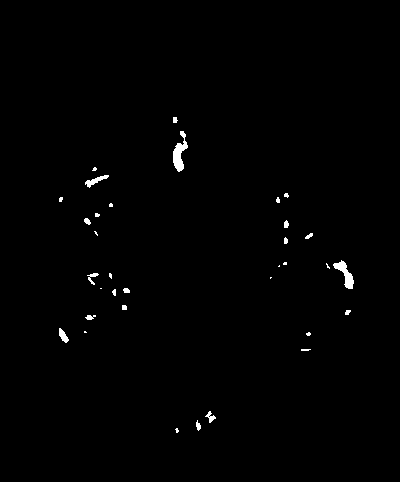

In [48]:
Image.fromarray(msk_example==2).rotate(90).resize((400,512)).crop((0,30,400,512))

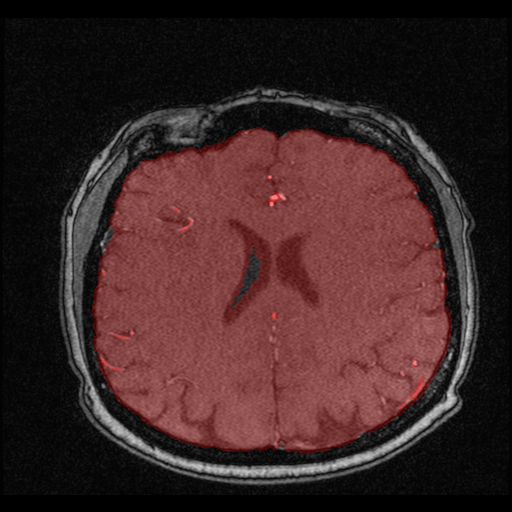

In [49]:
import numpy as np

img_example = np.load(
    f"preprocess_{DATASET_NAME}/train/sub-OAS30001_ses-d2430_acq-TOF_angio_slice148.npy", allow_pickle=True
).item()

img_example, msk_example = img_example["data"][:,:,0], img_example["mask"]

msk_example = np.argmax(msk_example, axis=-1)

display_slice(img_example, min_val=-1, max_val=1, mask=msk_example/2)

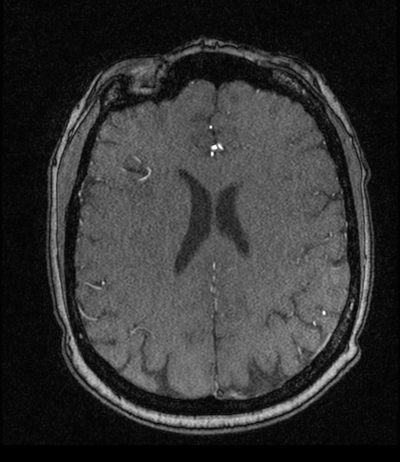

In [50]:
from PIL import Image

Image.fromarray(((img_example+1)*127.5).astype(np.uint8)).rotate(90).resize((400,512)).crop((0,50,400,512))

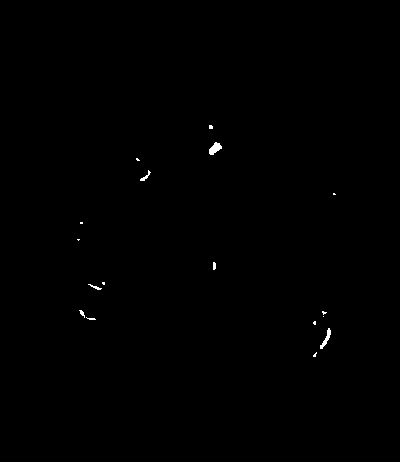

In [51]:
Image.fromarray(msk_example==2).rotate(90).resize((400,512)).crop((0,50,400,512))

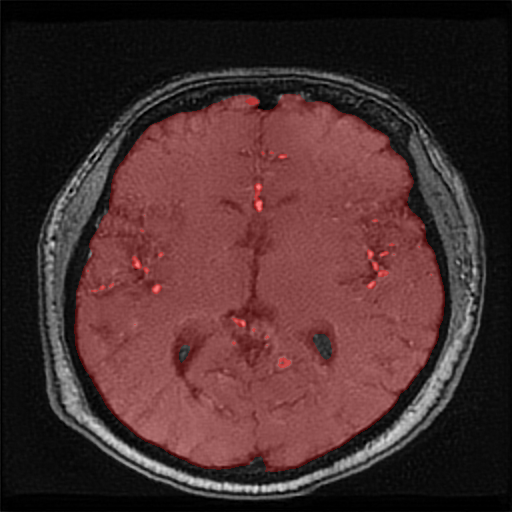

In [53]:
import numpy as np

img_example = np.load(
    f"/home/galati/A2V_FL/phase2/fake_OASIS/fakeVolume1_slice208.npy", allow_pickle=True
).item()

img_example, msk_example = img_example["data"][:,:], img_example["mask"]

msk_example = np.argmax(msk_example, axis=-1)

display_slice(img_example, min_val=-1, max_val=1, mask=msk_example/2)

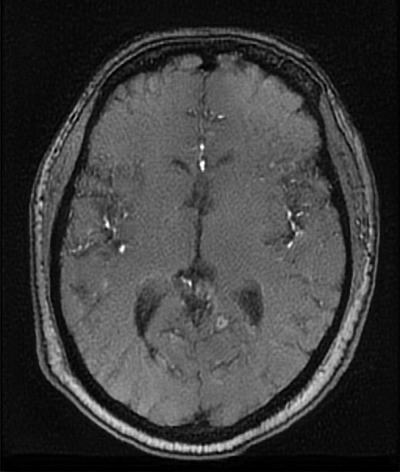

In [55]:
from PIL import Image

Image.fromarray(((img_example+1)*127.5).astype(np.uint8)).rotate(90).resize((400,512)).crop((0,40,400,512))

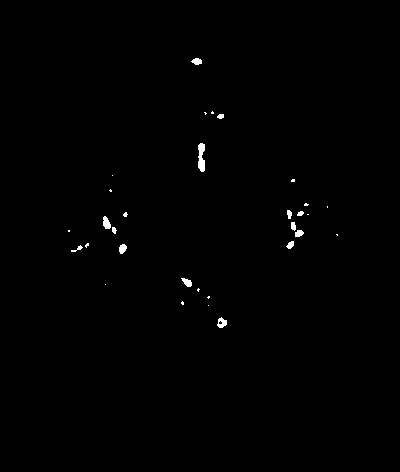

In [56]:
Image.fromarray(msk_example==2).rotate(90).resize((400,512)).crop((0,40,400,512))

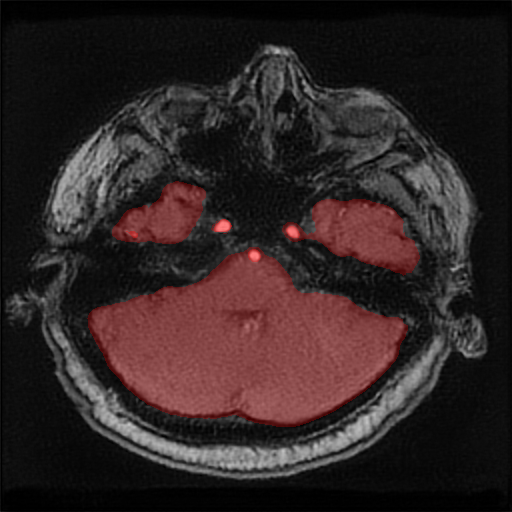

In [16]:
import numpy as np

img_example = np.load(
    f"/home/galati/A2V_FL/phase2/fake_OASIS/fakeVolume1_slice080.npy", allow_pickle=True
).item()

img_example, msk_example = img_example["data"][:,:], img_example["mask"]

msk_example = np.argmax(msk_example, axis=-1)

display_slice(img_example, min_val=-1, max_val=1, mask=msk_example/2)